In [1]:
import pandas as pd
import seaborn as sns
pd.options.display.max_rows = 999

### Reading the csv file using read_csv method

In [3]:
df = pd.read_csv('shootings.csv')

### Creating Year, Month, Day_of_month columns

In [4]:
df['month'] = pd.to_datetime(df.date).dt.month
df['year'] = pd.to_datetime(df.date).dt.year
df['day_of_month'] = pd.to_datetime(df.date).dt.day

### Columns in our dataset

In [5]:
df.columns.values

array(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera', 'arms_category', 'month', 'year',
       'day_of_month'], dtype=object)

### Do we have any missing entries?

In [6]:
df.isna().any()
# True if a column have a missing entry, False otherwise

id                         False
name                       False
date                       False
manner_of_death            False
armed                      False
age                        False
gender                     False
race                       False
city                       False
state                      False
signs_of_mental_illness    False
threat_level               False
flee                       False
body_camera                False
arms_category              False
month                      False
year                       False
day_of_month               False
dtype: bool

### Data types

In [7]:
df.dtypes

id                           int64
name                        object
date                        object
manner_of_death             object
armed                       object
age                        float64
gender                      object
race                        object
city                        object
state                       object
signs_of_mental_illness       bool
threat_level                object
flee                        object
body_camera                   bool
arms_category               object
month                        int64
year                         int64
day_of_month                 int64
dtype: object

### Categorical / Numerical columns

In [8]:
categorical_columns = [
    'name', 'date', 'manner_of_death', 'armed', 'gender', 'race', 'city',
    'state', 'threat_level', 'flee', 'arms_category',  'signs_of_mental_illness',
    'body_camera'
]

numerical_columns = ['id', 'age']

engineered = ['year', 'month', 'day_of_month']

assert set(numerical_columns + categorical_columns + engineered) == set(df.columns)

### Analyzing numerical columns

In [9]:
# Id is a a unique identifier for each shooting, analytically useless.

#### Age distribution

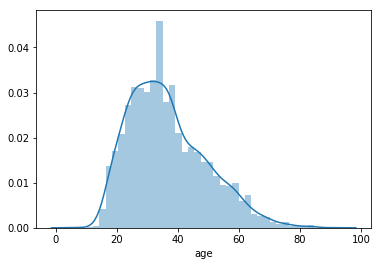

In [10]:
sns.distplot(df['age'])

In [11]:
# Number of shootings per age
df.age.astype(int).value_counts().sort_index()

6       2
12      1
13      1
14      3
15     13
16     30
17     47
18     93
19     82
20     90
21     99
22    113
23    125
24    152
25    176
26    140
27    165
28    150
29    160
30    146
31    174
32    159
33    164
34    159
35    143
36    145
37    222
38    121
39    116
40    104
41    110
42     92
43     78
44     76
45    105
46     83
47     87
48     75
49     73
50     80
51     68
52     54
53     62
54     48
55     49
56     52
57     43
58     49
59     51
60     29
61     31
62     28
63     25
64     20
65     18
66     14
67     13
68     13
69     13
70     11
71      8
72      5
73      4
74      4
75      4
76      8
77      3
78      1
79      1
80      2
81      1
82      2
83      2
84      4
91      1
Name: age, dtype: int64

### Values in each category

In [12]:
for column in categorical_columns:
    print(f'Values repartition for "{column}":')
    print(df[column].value_counts())
    print('\n\n\n')

Values repartition for "name":
TK TK                               29
Benjamin Diaz                        2
Robert Martinez                      2
Eric Harris                          2
Jose Mendez                          2
Michael Brown                        2
Timothy Leroy Harrington             2
Brandon Jones                        2
Clayton Andrews                      2
Michael Johnson                      2
Jeffrey Sims                         2
Roderick McDaniel                    2
Robert Edwards                       2
Miguel Mercado Segura                2
David Tylek Atkinson                 2
Michael Ferguson                     2
Joseph Santos                        2
Quencezola Maurice Splunge           1
Kevin Close                          1
Yohans Leon                          1
William Evans                        1
Melvin Watkins                       1
Mary Lawrence                        1
David L. Hicks                       1
Alexander W. Simpson             

### Grouping unfrequent guns

In [13]:

other_sharp_objects = ['meat cleaver', 'pick-axe', 'straight edge razor', 'samurai sword', 'pitchfork', 'lawn mower blade',
                       'glass shard', 'spear', 'bayonet', 'machete', 'sword', 'sharp object', 'box cutter', 'scissors', 'ax']

toy_gun = ['crossbow', 'pellet gun', 'bow and arrow', 'bean-bag gun', 'air pistol']

blunt_object = [
    'piece of wood', 'BB gun', 'pipe', 'shovel', 'baton', 'crowbar', 'chair', 'chain', 'metal stick', 'metal pole', 'pole',
    'metal object', 'pole and knife', 'pitchfork', 'garden tool', 'brick', 'chain saw', 'cordless drill', 'baseball bat and bottle',
    'flashlight', 'air conditioner', 'pen', 'metal rake',  'baseball bat and bottle', 'flagpole', 'baseball bat and fireplace poker',
    'ice pick', 'wrench', 'barstool', 'walking stick', 'chainsaw', 'carjack', 'metal hand tool', 'nail gun', 'beer bottle', 'stapler',
    'baseball bat', 'hammer', 'metal pipe', 'screwdriver', 'hatchet', 'rock'
]

other = ['incendiary device', 'pepper spray', 'fireworks', 'wasp spray', 'hand torch', "contractor's level", 'grenade']

gun_and_car = ['gun and vehicle', 'vehicle and gun']

gun = ['guns and explosives', 'hatchet and gun', 'machete and gun', 'gun and sword', 'gun and knife']

vehicle = ['BB gun and vehicle', 'car, knife and mace', 'oar', 'vehicle and machete']
    
    
# Create a mapping. Key: unfrequent arm name, value: Category. E.g 'air pistor': toy_gun  
mappings = {'motorcycle': 'vehicle', 'pick-axe': 'ax', 'baseball bat and knife': 'knife'}
mappings.update({arm: 'other sharp objects' for arm in other_sharp_objects})
mappings.update({arm: 'toy gun' for arm in toy_gun})
mappings.update({arm: 'blunt object' for arm in blunt_object})
mappings.update({arm: 'other' for arm in other})
mappings.update({arm: 'gun and car' for arm in gun_and_car})
mappings.update({arm: 'gun' for arm in gun})
mappings.update({arm: 'vehicle' for arm in vehicle})

# Replace all rare values
df.armed = df.armed.replace(mappings)
# Capetalize the first letter of each word
df.armed = [arm_name.capitalize() for arm_name in df.armed.values]

In [14]:
# Outcome:
df.armed.value_counts()

Gun                    2777
Knife                   709
Unknown                 418
Unarmed                 348
Toy weapon              171
Blunt object            148
Other sharp objects     133
Vehicle                 125
Taser                    24
Gun and car              23
Toy gun                  11
Other                     8
Name: armed, dtype: int64

### Useless columns

In [15]:
# Columns with high dimensionality do not provide a big statistical value
print("Columns dimenstionality:")
for column in df.columns:
    print(f"\t{column}: {df[column].nunique()}")

Columns dimenstionality:
	id: 4895
	name: 4851
	date: 1792
	manner_of_death: 2
	armed: 12
	age: 76
	gender: 2
	race: 6
	city: 2288
	state: 51
	signs_of_mental_illness: 2
	threat_level: 3
	flee: 4
	body_camera: 2
	arms_category: 12
	month: 12
	year: 6
	day_of_month: 31


In [123]:
to_drop = ['id', 'name', 'city']

In [16]:
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category,month,year,day_of_month
0,3,Tim Elliot,2015-01-02,shot,Gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns,1,2015,2
1,4,Lewis Lee Lembke,2015-01-02,shot,Gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns,1,2015,2
2,5,John Paul Quintero,2015-01-03,shot and Tasered,Unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed,1,2015,3
3,8,Matthew Hoffman,2015-01-04,shot,Toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects,1,2015,4
4,9,Michael Rodriguez,2015-01-04,shot,Blunt object,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects,1,2015,4
